In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Loading data

df = pd.read_csv("../data/movie_metadata.csv")

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [7]:
df.dropna(inplace=True)
df.drop_duplicates(subset='movie_title', inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3654 non-null   object 
 1   director_name              3654 non-null   object 
 2   num_critic_for_reviews     3654 non-null   float64
 3   duration                   3654 non-null   float64
 4   director_facebook_likes    3654 non-null   float64
 5   actor_3_facebook_likes     3654 non-null   float64
 6   actor_2_name               3654 non-null   object 
 7   actor_1_facebook_likes     3654 non-null   float64
 8   gross                      3654 non-null   float64
 9   genres                     3654 non-null   object 
 10  actor_1_name               3654 non-null   object 
 11  movie_title                3654 non-null   object 
 12  num_voted_users            3654 non-null   int64  
 13  cast_total_facebook_likes  3654 non-null   int64

In [40]:
# Searching for the most popualar directors
df['director_name'].nunique()

1658

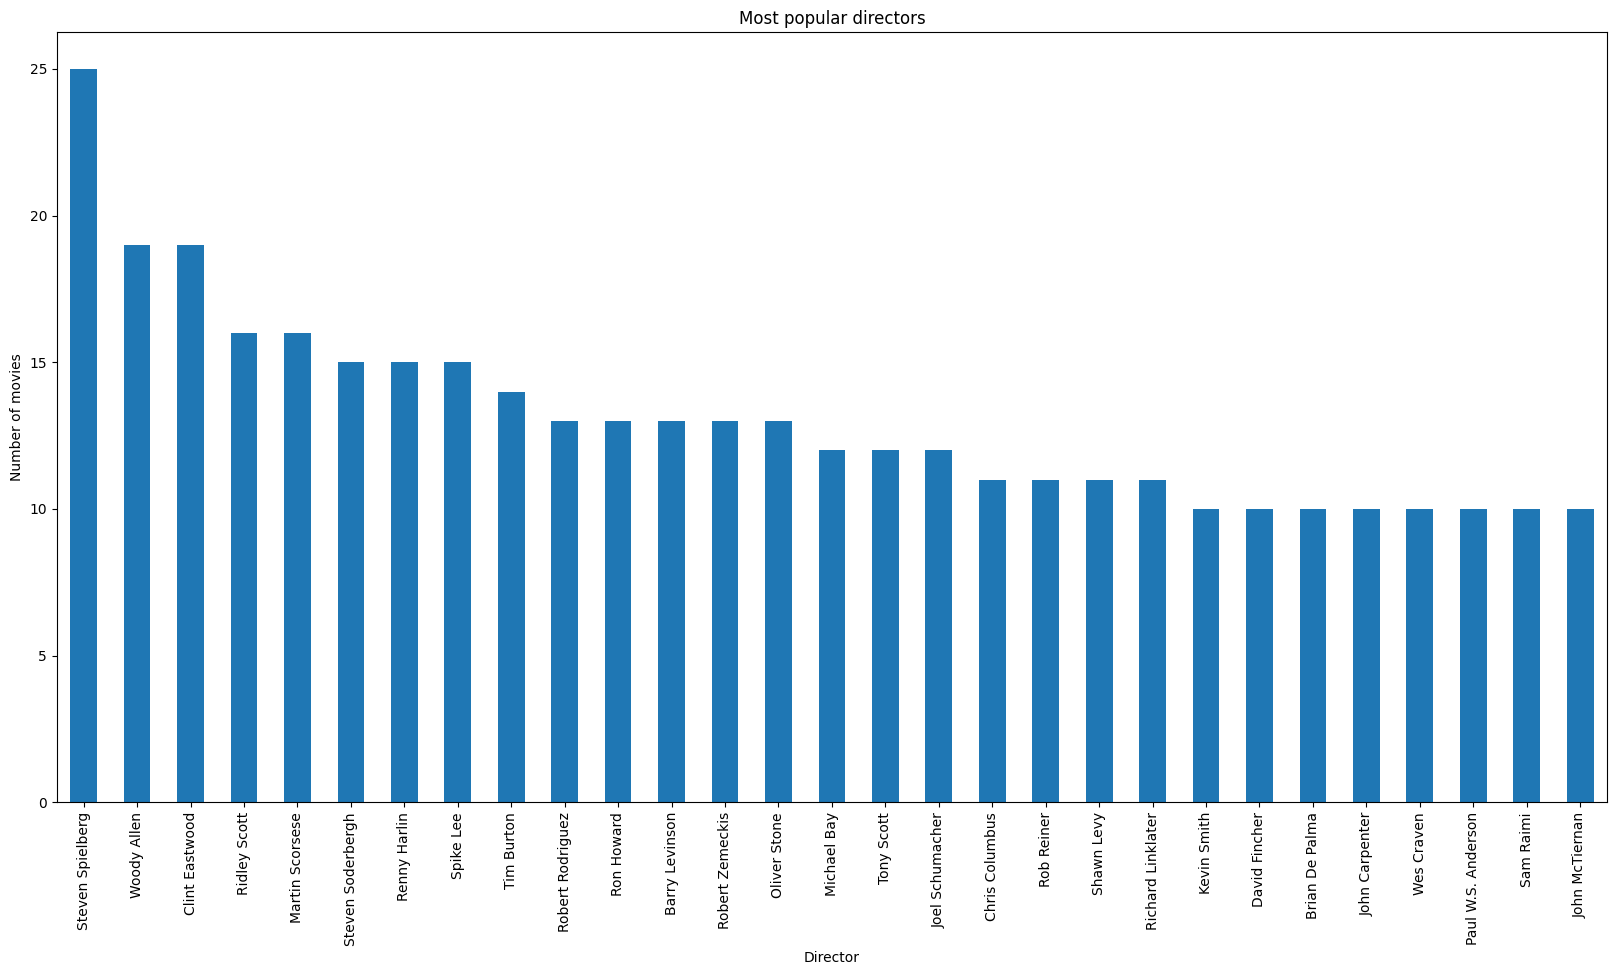

In [11]:
produced_movies = df['director_name'].value_counts()

plt.figure(figsize=(20, 10))
produced_movies[produced_movies >= 10].plot(kind='bar')
plt.xlabel('Director')
plt.ylabel('Number of movies')
plt.title("Most popular directors")
plt.show()

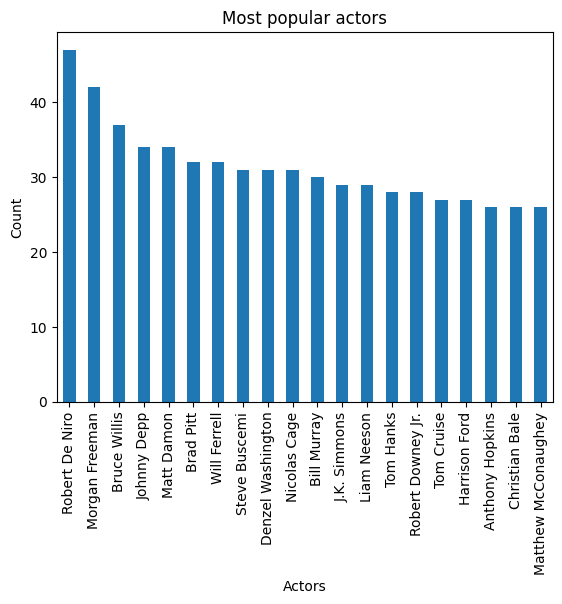

In [17]:
# Searching for the most popular actors
actors_df = df[['actor_1_name', 'actor_2_name', 'actor_3_name']]

actors_df = actors_df.values.flatten()
value_counts = pd.Series(actors_df).value_counts()
value_counts = value_counts[value_counts > 25]

# Plot the value counts
value_counts.plot(kind='bar')

# Set the plot title and labels
plt.title('Most popular actors')
plt.xlabel('Actors')
plt.ylabel('Count')

# Display the plot
plt.show()


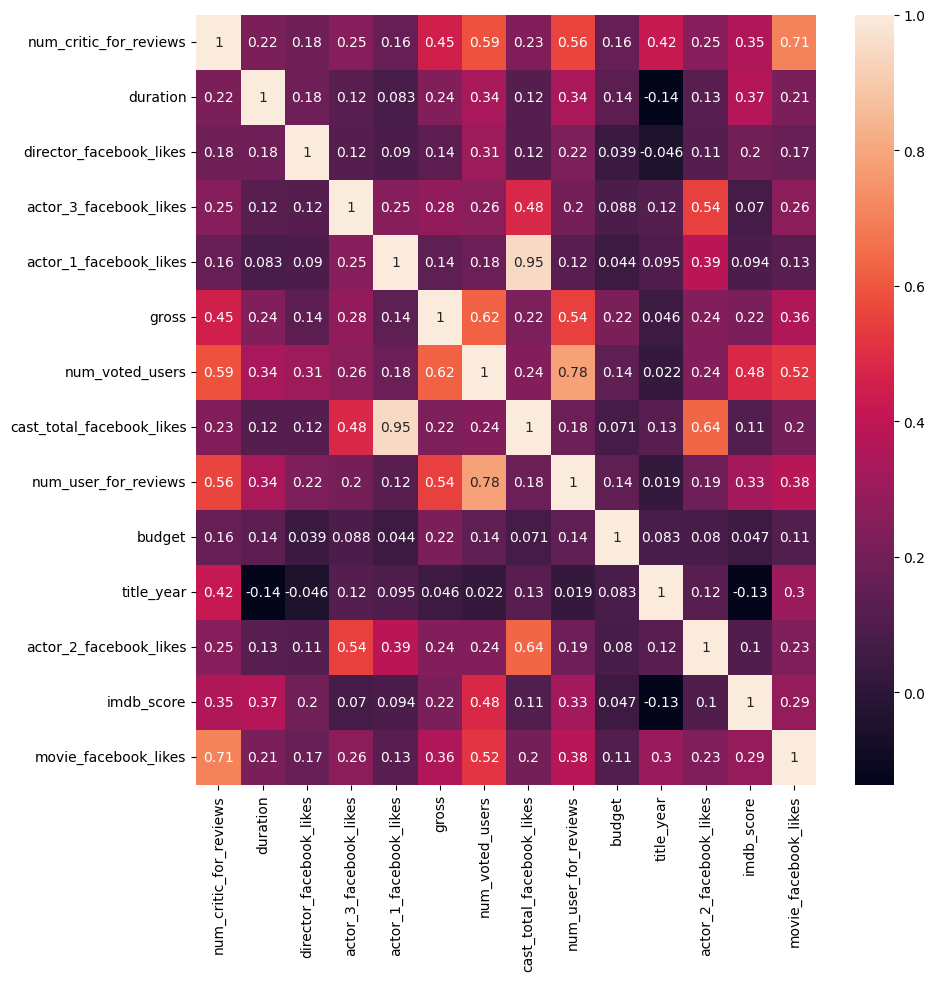

In [36]:
columns = ['num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews',
       'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes']

heatmap_df = df[columns]

plt.figure(figsize=(10, 10))
corr = heatmap_df.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

c:\Users\Rokas\Desktop\capstone_project\.venv\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


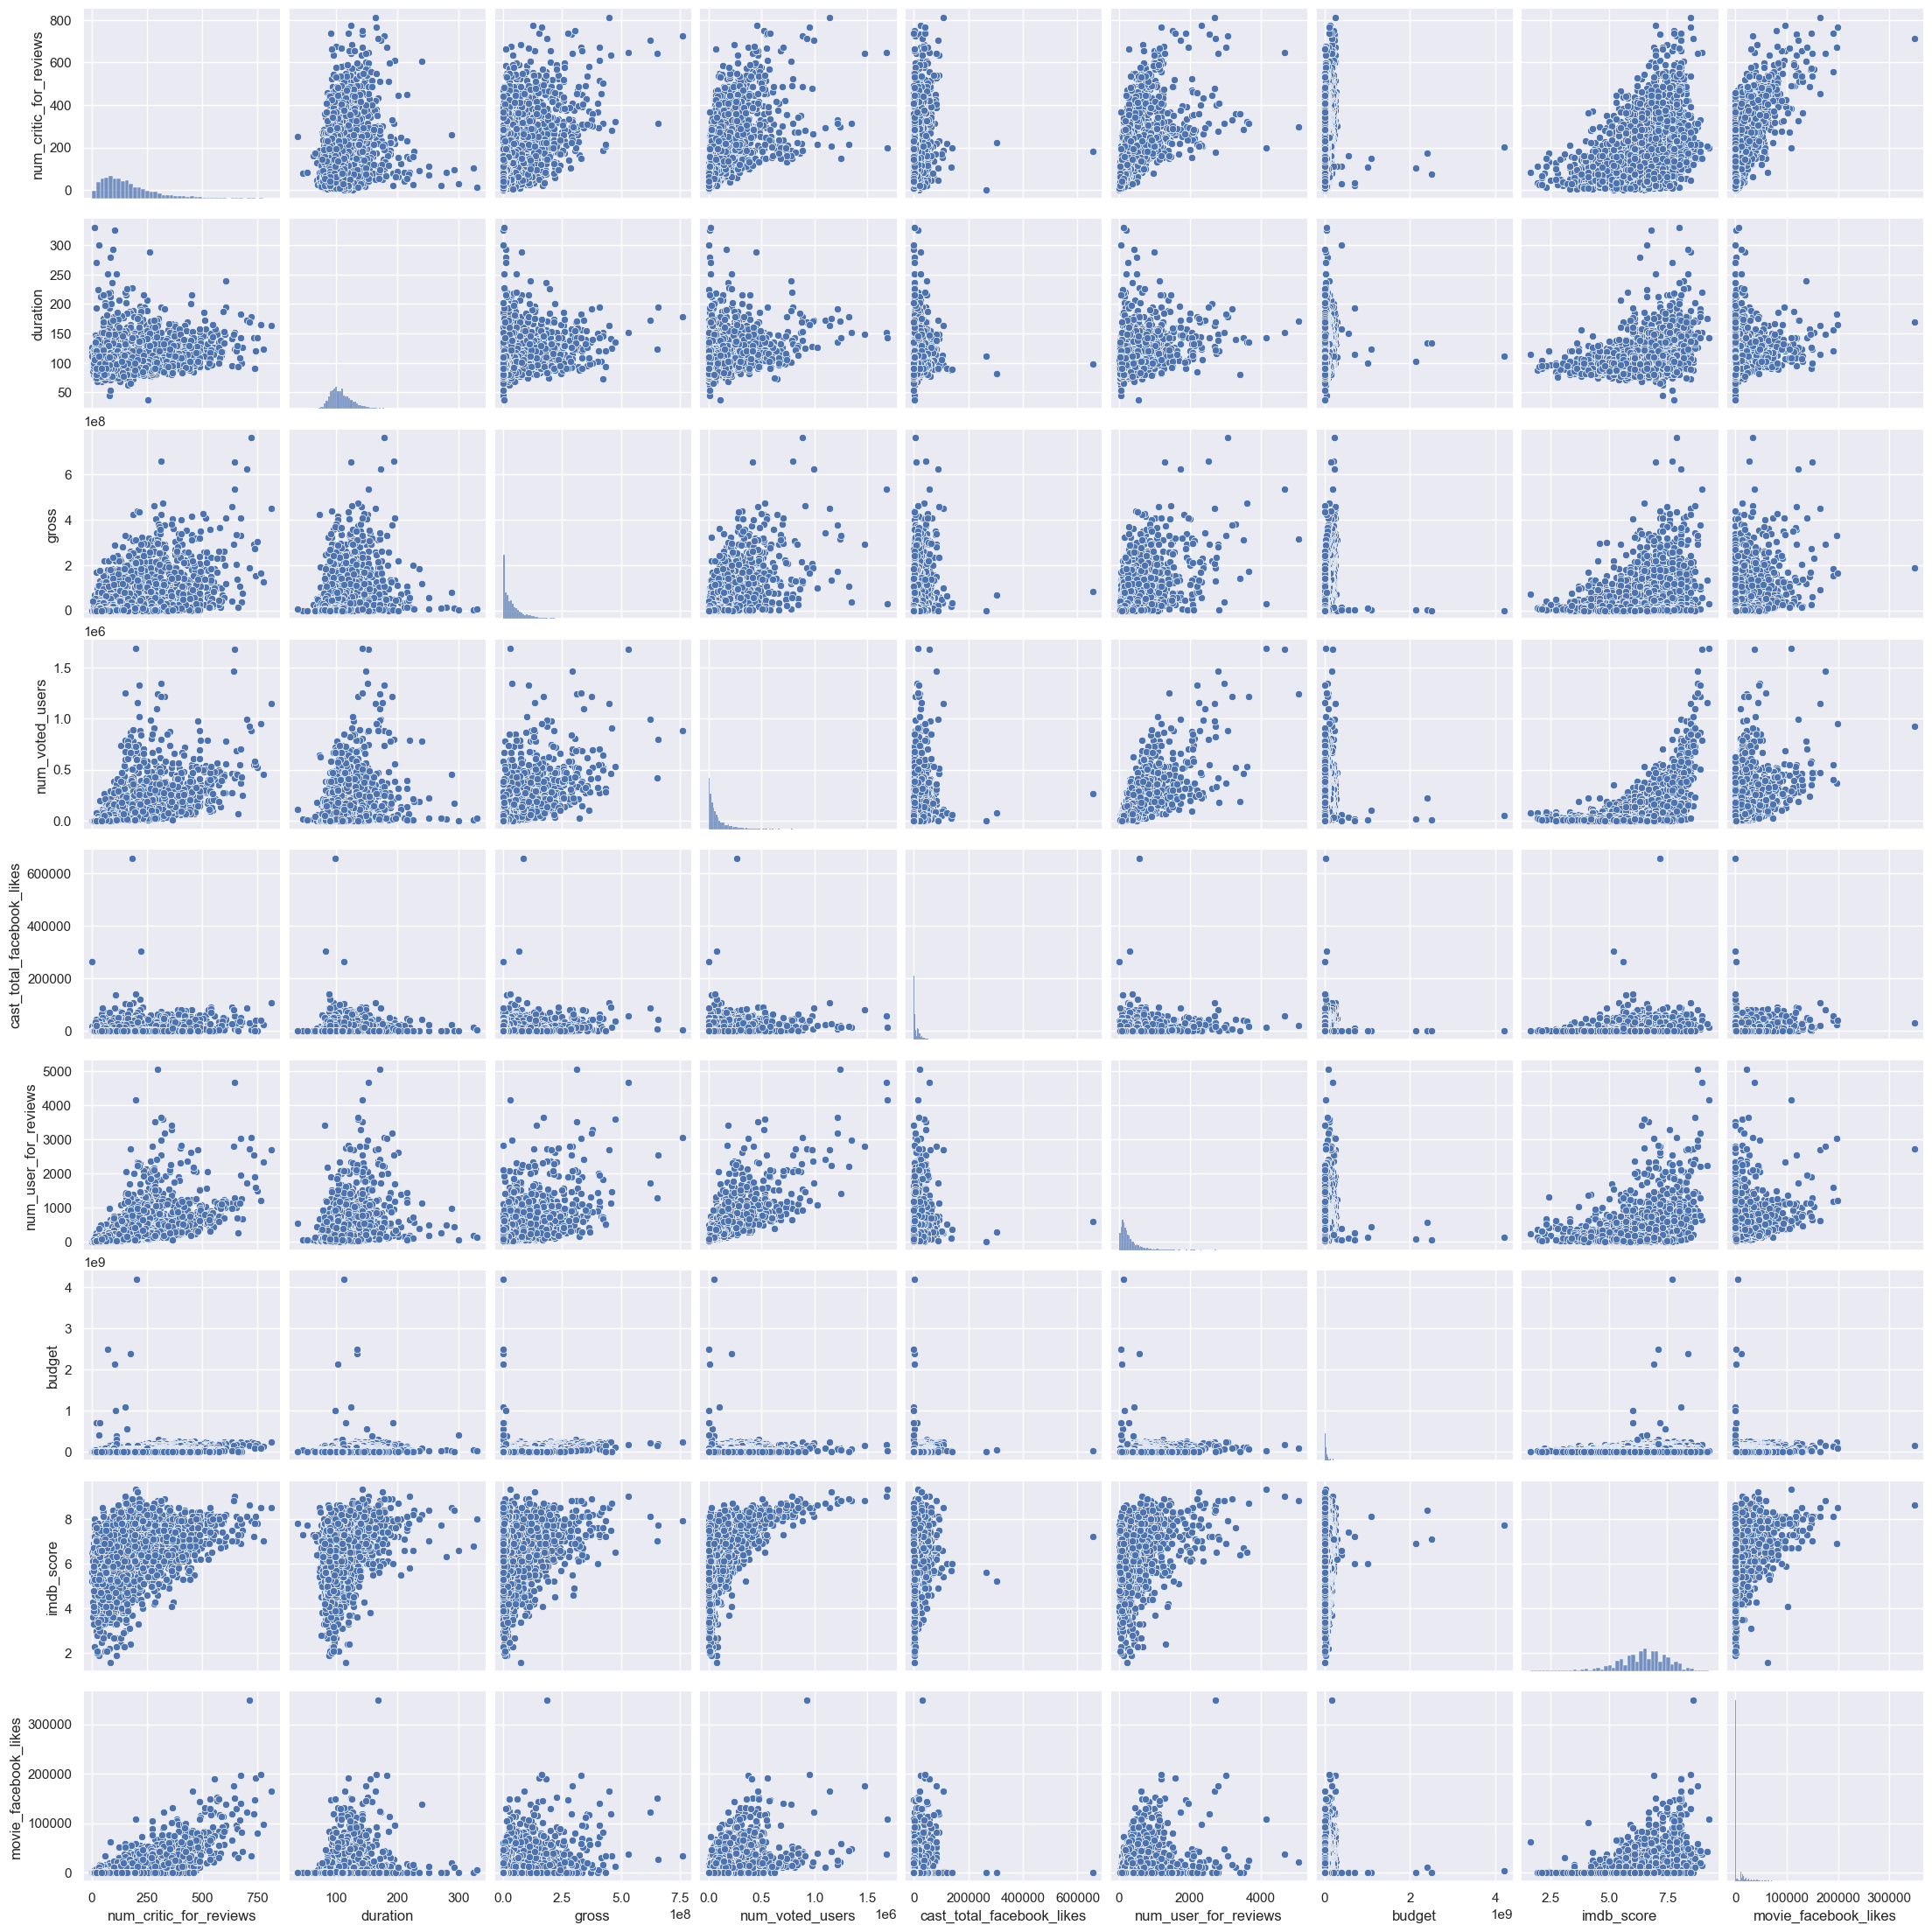

In [38]:
sns.set()
cols = ['num_critic_for_reviews', 'duration',
       'gross', 'num_voted_users', 'cast_total_facebook_likes',
       'num_user_for_reviews', 'budget', 'imdb_score', 'movie_facebook_likes']
sns.pairplot(df[cols], size = 2.5)
plt.show()